<a href="https://colab.research.google.com/github/preetida/PFB2019-Walkthrough/blob/master/2021ComputeFest_NotebookToCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the 2021 ComputeFest "Notebook to Cloud" Workshop!

This notebook is *view only*. To **run this notebook** during the workshop, either:

- **Make a copy:** File > Save a copy in Drive...

- **Run in playground mode:** File > Open in playground mode

To get access to the code we will be demoing during the workshop, please clone our repo:

*   If you have already cloned the repo, please `cd \your_computefest_folder` and `git pull` in the terminal.
*   If you have not cloned [the repo](https://github.com/Harvard-IACS/2021-ComputeFest.git) yet, please `mkdir \your_computefest_folder`, `cd \your_computefest_folder` and `git clone https://github.com/Harvard-IACS/2021-ComputeFest.git` in the terminal.

# Lecture

![progress](https://progress-bar.dev/0/?scale=100&title=Lecture&width=960&color=babaca&suffix=% "progress")

# Workshop

The workshop is divided into two parts to demonstrate why we want to deploy our Python programs onto the cloud and how to move from a notebook to the cloud. The first part will discuss the performance of Python in the development environment as well as code efficiency. The second part will be a hands-on interactive demonstration of how to deploy a machine learning program using Docker.

#Part I: Python Performance

![progress](https://progress-bar.dev/14/?scale=100&title=PythonPerformance&width=960&color=babaca&suffix=% "progress")


The Jupyter notebook is a commonly used development environment when it comes to writing Python code. It is easy to learn and handy to use. By running a cell, you can interact with your code and see your results. Some pros of developing in a notebook are

*   Easy to use: You can break your code into different cells and have immediate outputs. It's good for validating ideas and variable values.
* Visual and Interactive:  You can see your changes in real-time.
*   Non-linear development: You can go back to a cell and modify variables/functions at any time instead of rerunning the entire notebook.

There is always a tradeoff when it comes to developing large-scale applications.  In the first part of the workshop, we assume that participants are familiar with using Jupyter notebooks, and we focus on some advice for how to improve your efficiency when working with a notebook.  We will concentrate on two areas for efficiency improvement:
  1. How, why, and when to move from a notebook to a script
  2. Writing better, more performant code.

### Example 1

We will start with a simple toy example. Let's say we are now in a calculus class and the instructor wants us to plot a function $y = \frac{\sqrt{x^2+\sin^2(15x)}}{1-x}$ when $x \in [0,0.5]$.

There will be four steps to plot this function using Python:
1. Load modules
2. Define domain $x$
3. Denote $y$ as a function of $x$
4. Plot $y$


In [ ]:
# Step 1: load modules
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Define domain x
x = np.linspace(0.0, 0.5, 11, endpoint=True)
print("x: ", x)

x:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]


In [ ]:
# Step 3: Denote y as a function of x
y = np.sqrt( (x*x + np.sin(15*x)*np.sin(15*x)) ) / (1-x)
print("y: ", y)

y:  [  0.           0.30224103   0.58964326   0.83576749   1.016811
   1.11388335   1.11501492   1.01684728   0.82637444   0.56553497
   0.30596889   0.34706363   0.66238513   0.9936084    1.27145501
   1.46075542   1.53867664   1.4943518    1.33203923   1.07914504
   0.81321212   0.72471797   0.96272695   1.36860818   1.7837082
   2.12588236   2.34547512   2.41322585   2.32212153   2.09730445
   1.81975556   1.66412552   1.84254803   2.36200294   3.04943735
   3.74739114   4.34576366   4.76788885   4.96998795   4.95646123
   4.81640555   4.78452681   5.25420408   6.57313452   8.83864246
  12.06677009  16.47422948  22.865666    34.04128873  64.7241783
          inf -54.72209523 -26.13918095 -17.95075825 -14.73506942
 -13.1020547  -11.90872474 -10.75701938  -9.542202    -8.28729268
  -7.07810329  -6.03229303  -5.26814983  -4.85003271  -4.7330055
  -4.78037485  -4.84573039  -4.82965663  -4.68875876  -4.4256043
  -4.07737098  -3.7059641   -3.38548794  -3.18007523  -3.11344279
  -3.1542599

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


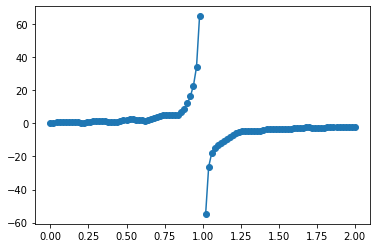

In [ ]:
# Step 4: Plot y
plt.plot(x, y, '-o')
plt.show()

The customer is not satisfied with this plot for it has too few points and it looks like a polyline instead of a smooth curve. One way to have a more smoothed curve is to have more intervals in $x$, so the developers decide to divide the domain $x$ into 100 intervals.

In [ ]:
# Step 5: Change domain x
x = np.linspace(0.0, 0.5, 101, endpoint=True)
print("x: ", x)

x:  [0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3   0.305 0.31  0.315 0.32  0.325 0.33  0.335 0.34  0.345 0.35  0.355
 0.36  0.365 0.37  0.375 0.38  0.385 0.39  0.395 0.4   0.405 0.41  0.415
 0.42  0.425 0.43  0.435 0.44  0.445 0.45  0.455 0.46  0.465 0.47  0.475
 0.48  0.485 0.49  0.495 0.5  ]


After changing the number of intervals in $x$, the customer feels more satisfied but now, wants to see the plot of $y$ in $x \in [0,2]$.

In [ ]:
# Step 5: Change domain x
x = np.linspace(0.0, 2.0, 101, endpoint=True)
print("x: ", x)

x:  [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]


Even in a very simple example we're likely to make errors when coding in a notebook. This non-linear development feature of notebook can be good and bad at the same time. It's good because you can always output and adjust variables at any time, but it's bad because you will easily forget to change a corresponding variable/function, run other cells, and then have to end up getting the wrong output.

Developing in a script may seem unattractive at first sight. As developers, we always want to have an immediate response of our program if we want to test something. The linear development feature of a script makes it difficult to do so, i.e. we will have to run the entire script and have many print/if/try-except statements to test our program. However, the linear development feature in the script ensures we will be unlikely encounter the similar errors when it comes to changing variables in the notebook (and allows us to practice writing good code).

### Recap
* We defined a function and plotted it.
* However, we decided that it didn't have enough points *and* that the domain needed to be changed.
* So we defined a new domain with more points.
* We already created a cell to do the plot.  Instead of re-writing this cell, we just returned to it and tried to re-plot.
* This caused two potential problems:
  1. We might forget to re-define $y$
  2. Our original function has no meaning anymore because it has a singularity in it!

Of course, this exercise was completely contrived (e.g. you would likely have written a function to do the plotting for you).  However, such situations *do* frequently arise when running very big and complex notebooks.


### How Is This Possible?!?!

In [ ]:
def f(x):
  return x + 1

In [ ]:
x = 1
print(f(x))

3


### Conda Environment Setup

To ensure we are all using the same environment (i.e. the same Python version and the same modules) please run the following commands.

```
$ cd /your_computefest_folder/2021-ComputeFest/Day 3/PythonPerformance/
$ conda env create -f environment.yml
$ conda activate python_performance_env
```

We have now switched to the environment that the presenters used when they developed this part of code.

### Activity 1
Please open `/your_computefest_folder/2021-ComputeFest/Day 3/PythonPerformance/plot_function.py` in Sublime Text or other preferred text editor and complete the script. Run it in your terminal `python plot_function.py`.

### Example 2

Now we've seen how developing a simple code in the notebook would be problematic, let's move to a more complicated example. The folder `/your_computefest_folder/2021-ComputeFest/Day 3/PythonPerformance/regenerative_morph/` contains an example of creating a morphed image based on two input images. For example, if we are given two frames of an animation, Frame 50 and Frame 60, we can use this example to create Frame 55, which is the in-between of the two input images. This example implements "[Regenerative Morphing](https://grail.cs.washington.edu/projects/regenmorph/)" proposed by Shechtman et al.



![How to do regenerative morphing](https://drive.google.com/uc?id=1WcQ9pS-ONoI4A0etwJVdKI5GU7jPumWV)

<!-- 
![How to do regenerative morphing](https://doc-0k-ak-docs.googleusercontent.com/docs/securesc/9b8pb5vl29fpebqp9c04klfmdjnjkbf2/a2n0hid7ei45atq6vq2ebkpddp6al490/1579291200000/14031428554834639237/08070606809969017334/1WcQ9pS-ONoI4A0etwJVdKI5GU7jPumWV?h=06292197958150832157&authuser=0) -->

<!-- <img src="https://drive.google.com/uc?id=1WcQ9pS-ONoI4A0etwJVdKI5GU7jPumWV" alt="morph" width="400"/> -->

In the second example we'll go through the development process of the regerative morphing code, spot the mistakes or where to improve in the development process, and test Python performance in different settings. 

### Activity 2

First, let's scroll through the two notebooks used in the actual development. What are the potential/existing issues?

 [Notebook 1](https://colab.research.google.com/drive/1eESxJh5H8GyGQa7027Vf4woPbIMFjY72): Used for initial development

 [Notebook 2](https://colab.research.google.com/drive/1lZOynX7lKcJ-Oj0wFBz9P0NeHGhZFE0r): Cleaned up in order to run on cluster



*   Messy
*   Heavyweight (Not straightforward text file)
*   Global variables not passed into functions
*   ...


### Back to Example 2

However tempting and easy developing in a notebook may seem, it is sometimes better to work with classical scripts in text files. (This does not mean you should entirely abandon using notebooks.  They are a truly wonderful tool.) In the current directory, you will find the a Python script version of the program called `regenerative_morph.py`. Moving from notebook to script can improve the Python performance in at least the following aspects:

*   Lightweight: The `.py` file is 11 KB
*   Version control: `.ipynb` files are hard to version and track diffs
*   Linear development cycle
*   Used in actual dev environment
*   ...



Transitioning from notebook to script is one way to improve the performance. Another way to improve the performance is, unsurprisingly, writing better, more efficient code. Now we will look at two scripts and see how code efficiency will affect performance.


### Activity 3

Let's start with a small toy example first. Below is a small codelet that finds the smallest distance between the number 1.33 and a list of random numbers. Run the two cells and compare their runtime.

In [ ]:
import time
import random

A = 1.33
N = 1000000
B = [random.random() for _ in range(N)]

start = time.time()
dist = []
for b in B:
  d = abs(A-b)
  dist.append(d)
minDist = min(dist)
end = time.time()

print('The smallest distance is ', minDist)
print('Time elapsed: ', end - start, ' s.')

The smallest distance is  0.3300006231460332
Time elapsed:  0.27053380012512207  s.


In [ ]:
C = np.array(B) # convert to a numpy array

start = time.time()
minDist = np.min(np.abs(C-A)) # use "vectorized" numpy functions
end = time.time()

print('The smallest distance is ', minDist)
print('Time elapsed: ', end - start, ' s.')

The smallest distance is  0.3300006231460332
Time elapsed:  0.00819253921508789  s.


The NumPy library takes advantage of a processor feature called Single Instruction Multiple Data (SIMD) to process data faster; this allows for breaking down a task into multiple fragments, and then processing all the fragments in parallel. Relatedly, NumPy integrates C, C++, and Fortran (low-level languages) codes into Python (a high-level language), and we can see the drastic speed-up just in the simple example above!

### Activity 4

Now that we've seen how utilizing certain libraries and being smart about our implementation will improve the performance, another question emerges: For a `.py` file with hundreds (or many more!) of lines of code, how do we know which function to improve/rewrite?

A useful tool to pin down which part of the code can be improved is a [profiler](https://docs.python.org/3/library/debug.html). A profiler gives detailed runtime information on each function, which hints at the places for improvement and where the bottlenecks may be. Some often-used profilers are `cProfile`, `profile` and some [custom built packages with visualization](https://stackoverflow.com/questions/582336/how-can-you-profile-a-python-script) (flow chart or pie chart). This [documentation](https://docs.python.org/2/library/profile.html) explains all the terminology in the output, and this [page](https://pymotw.com/2/profile/) presents another examples of how to use profilers in practice. Please refer to the links for more detail.

Now let's see how to profile the `regenerative_morph_slow.py` script.

(Note: You can try to run this script, but please note that it will take a long time to run; if you decide to run it and find that it's taking too long, you can always `Crtl+C` to stop running the script.)

```
$ python regenerative_morph_slow.py

707299794 function calls (707299099 primitive calls) in 4696.221 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   ...
   254662   13.713    0.000   20.434    0.000 regenerative_morph_slow.py:113(pixel_complete)
        3    5.763    1.921 4695.911 1565.304 regenerative_morph_slow.py:136(target2sources)
       27    0.000    0.000    0.003    0.000 regenerative_morph_slow.py:19(im2col_sliding_strided)
        1    0.012    0.012 4696.219 4696.219 regenerative_morph_slow.py:274(regenerative_morph)
        9    0.008    0.001    0.011    0.001 regenerative_morph_slow.py:36(create_patches)
    25424  954.729    0.038 4654.226    0.183 regenerative_morph_slow.py:54(patch_match)
    20300    2.991    0.000    4.146    0.000 regenerative_morph_slow.py:75(idx2patch)
   254662    2.425    0.000    2.425    0.000 regenerative_morph_slow.py:93(pixel_cohere)
   ...
```



We are most interested in `tottime`, which is the total time spent in the given function (and excluding time made in calls to sub-functions). 
It tells you how much time has been spent on that particular function. In the output above, we see that the program spends most of its time in the function `patch_match`. This tells us we may be able to improve the code a little bit, and as a result speed the execution time.

`cumtime`, on the other hand, is the cumulative time spent in this function and all subfunctions. Since the code is structured as `regenerative_morph` calls `target2sources`, and `target2sources` calls `patch_match`, it still tells us `patch_match` is the slowest and responsible for most of the runtime.



### Activity 5

Now let's pretend we ran `regenerative_morph.py` and `regenerative_morph_slow.py` separately. Compare the difference in runtime and script to see how the changes in `patch_match` has affected the performance. You can also modify the code to profile `regenerative_morph.py` and see how the runtime of each function has changed.

```
$ python regenerative_morph.py

# Sample output
Creating Frame 55
Time elapsed: 81.4702 s.
```

```
$ python regenerative_morph_slow.py

# Sample output: This one is fairly long to run. Can skip. 
Creating Frame 55
Time elapsed: 718.5240 s.
```



```
$ python regenerative_morph.py

3863970 function calls (3863275 primitive calls) in 100.510 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   ...
   254662   12.664    0.000   18.855    0.000 regenerative_morph.py:108(pixel_complete)
        3    4.450    1.483  100.237   33.412 regenerative_morph.py:131(target2sources)
       27    0.000    0.000    0.003    0.000 regenerative_morph.py:16(im2col_sliding_strided)
        1    0.010    0.010  100.509  100.509 regenerative_morph.py:269(regenerative_morph)
        9    0.007    0.001    0.010    0.001 regenerative_morph.py:33(create_patches)
    25424   51.818    0.002   63.029    0.002 regenerative_morph.py:50(patch_match)
    20300    2.752    0.000    3.803    0.000 regenerative_morph.py:70(idx2patch)
   254662    2.086    0.000    2.086    0.000 regenerative_morph.py:88(pixel_cohere)
   ...
```



Let us switch off the `python_performance_env` by typing the following in your terminal:

```
$ conda deactivate
```



### Conclusion

For development, it is a good habit to move from coding in notebook to script.

| Notebook 	| Script 	|
|:----------------------------------------------------:	|:--------------------------:	|
| Interactive and easy to use 	| Not interactive 	|
| Non-linear dev 	| Linear dev 	|
| Heavyweight 	| Lightweight 	|
| Hard to track changes 	| Version control 	|
| Good for education, documentation, tutorials, etc	| Good for production 	|
| Require additional setup if need to run on the cloud 	| Easy to run on the cloud 	|

However, moving from notebook to script isn't the end of the solution to improve program performance. Often times we find our laptops simply do not have the resource or power to run some machine learning or neural network programs. For example, to generate a neural style transferred image for Example 2, it would take 2~3 hours on a CPU to generate a result, whereas on AWS EC2 GPU it takes a couple minutes. For people lacking computing resources (most of us), sending our scripts to cloud and allowing the cloud do the job will drastically increase the development performance. What's more, if we want to work with other developers or release our program to the public, we will need to work on the cloud.

#### Additional Resources
[I don't like notebooks. - JupyterCon Talk by Alan Grus](https://www.youtube.com/watch?v=7jiPeIFXb6U)

[Potential option to creating Jupyter Notebooks in a more linear and reproducible way](https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/)

Now let's move to the second part of the workshop and learn the first steps of how to deploy a machine learning program onto the cloud with Docker.

# Part II: Docker

![progress](https://progress-bar.dev/50/?scale=100&title=Docker&width=960&color=babaca&suffix=% "progress")

*We assume you have completed HW0 and therefore:*
- Have Docker installed
- Cloned [2021-ComputeFest](https://github.com/Harvard-IACS/2021-ComputeFest) and have your terminal up and running
- Check that your Docker is running with the following command
```
$ docker run hello-world
```
- In the terminal, make sure you've executed
```
$ docker pull tensorflow/tensorflow:2.1.0-py3-jupyter
```

### Docker

Docker helps solve the problem in software development in which code can sometimes run differently on different platforms (e.g. Mac vs Windows), making it difficult to develop with others and deploy applications reliably.

Docker solves this problem by "containerizing" applications: creating *lightweight* (compared to virtual machines) packages that contain *everything* needed to run an app and are operating system independent (compared to virtual environments) as long as the OS is supported by the Docker Engine. Check out the [Docker](https://www.docker.com/resources/what-container) website for much more info.

<img src="https://www.docker.com/sites/default/files/d8/styles/large/public/2018-11/container-what-is-container.png?itok=vle7kjDj" alt="docker" width="400"/>

**Terminology:**

- **Docker Image:** a template (aka blueprint) created by Docker from the Dockerfile

- **Docker Container** running version of a Docker Image

  - Ways to remember this: image is the recipe and container is the dish; image is the class and container is instance of the class 

- **Docker Engine** creates, ships, and runs Docker containers wherever you want them deployed

- **Registry Service (Docker Hub or Docker Trusted Registry)** cloud or server-based storage and distribution service for your images (similar to GitHub)

### Dockerfile

You will see a file in `2021-ComputeFest/Day 3/ml_deploy_demo/` that is called a `Dockerfile`. This file is what we will use to tell Docker how to construct our Docker Image (more info [here](https://docs.docker.com/engine/reference/builder/)). Mehul will actually help you create a Dockerfile in a little bit!


Docker is very useful when it comes to:  

1. Cross-platform development

2. Application deployment

### First Docker Example

For this part, we will follow a simple **Tensorflow text classification** [example](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub). 
- We'll use this tensorflow [IMDB dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb) that contains the text of 50,000 movie reviews from the [Internet Movie Database](https://www.imdb.com/), split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

- Example review: 
'array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. ... ], dtype=object)>'

- Our goal is to serve a model trained to predict the sentiment (1 = "positive", 0 = "negative") of some text

- Training code can be found at: `ml_deploy_demo\ml_deply_demo\pipelines\keras.py`, but we will not focus on this part (see the code for more details)

- We have already trained a pretty decent model and saved it to: `2021-ComputeFest\Day 3\ml_deploy_demo\models\imbd\v1.keras`



In `2021-ComputeFest/Day 3/ml_deploy_demo/ml_deploy_demo` we provide all of the code needed to serve the model. The key tools we use for this example are:

1. [Flask](http://flask.palletsprojects.com/en/1.1.x/quickstart/#a-minimal-application): a popular web development framework for Python

2. [gunicorn](https://gunicorn.org/): an HTTP server for running our app

If you wish to see the relevant code to the present demo, please take a look at the following files:

- `api/app.py`
- `api/ml_app.py`
- `predict.py`
- `run.py`

**Note:** In the afternoon session, Shivas will do a deeper dive through these concepts and demonstrate different tools similar to these. Instead of Flask, he will introduce you to FastAPI and instead of gunicorn he will show you uvicorn.

### Building an Image

1. Navigate to the `ml_deploy_demo` folder: 
```
cd your_computefest_folder/2021-ComputeFest/Day 3/ml_deploy_demo/
```
This folder contains a `Dockerfile`, which is essentially a playbook for building Docker Images.

2. Build a Docker Image with 
```
docker build -t ml_deploy_demo:latest .
```
(Don't forget the "dot"!)

This will:

1. Use the current directory `.` to look for the `Dockerfile`, and then execute the instructions contained inside
2. Tag (`-t`) the *Docker Image*  that we create from the `Dockerfile` with the "repository name" `ml_deploy_demo` and "tag" `latest`.

### Sharing Images

If you create an account with [Docker Hub](https://hub.docker.com/), you can share Docker Images in a way very similar to how you share code on Github. 

- **Docker Pull**: `docker pull repository:tag` to pull Images from Docker Hub
- **Docker Push**: `docker push repository:tag` to push Images to Docker Hub

If you were not able to build the image above, try `docker pull connorcapitolo/ml_deploy_demo:latest` to get a pre-built version of the Image

Note: You'll only be able to pull this image if you have a Docker Hub account. Also, if you want to push this image to your DockerHub, just know that it may take a little while.

### Running a Container 

1. Run `docker images` to list the set of Docker Images available on your machine

    - We tagged the Image with repository `ml_deploy_demo` and tag `latest`

    - You can try this fancy command: 
    
    ``` 
    docker images | grep ml_deploy_demo | awk '{print $3}' 
    ```
    It's just a nice way to find the exact image and print out some information about the Docker ID.

2. Run a Docker Container  we just built.  **Specify the image ID** in place of `{image_id}` (Note:  You do NOT need the `{}` brackets for the actual ID.) . You can find the image ID in the `IMAGE ID` column after running the `docker images` command.
```
docker run -it --rm -p 5000:5000 {image_id} /bin/bash ml_deploy_demo/run.sh
```
This line actually runs our container and does a few important things:
- `-it` provides an interactive view
- `--rm` will delete the container when it is stopped
- `-p 5000:5000` forwards port 5000 from the container to our computer (called `localhost`)
- `/bin/bash ml_deploy_demo/run.sh` executes `run.sh` (starts the server)


3. Test it by running `make test_api` (see `Makefile` for more info) in a separate terminal window/pane. You should see something like:
```
HTTP/1.1 200 OK
Server: gunicorn/20.0.4
Date: Sun, 19 Jan 2020 21:14:19 GMT
Connection: close
Content-Type: application/json
Content-Length: 114
```
```
{"input":{"data":["this is the best!","this is the worst!"]},"pred":[[0.9529516100883484],[0.08470050245523453]]}
```

Nice, you just ran built and ran your first Docker container, which allowed you to make a prediction about the sentiment of these two movie reviews!

When you're reading to stop/remove the container (aka kill the foreground job), in your original terminal window perform the key combinations `Crtl+C`.




# More Docker Examples

We have just learn how to run a Docker container. But wouldn't it be fun to create our very own Dockerfile from scratch and put that in a container? Let's do that!

## Example 1: Building a Dockerfile and running it in a Docker Container

Before we start, make sure Docker Desktop is running. To do this, you can see the whale icon in your time bar (on a Mac).

### Building a Docker file for Linux Container
1. Navigate to the `docker_examples` folder: 
```
cd your_computefest_folder/2021-ComputeFest/Day 3/ml_deploy_demo/docker_examples/
```
This folder contains `day3.md`, a markdown file containing the agenda for Day 3.

2. Open a new `Dockerfile` in the text editor and save it under the same directory `docker_examples`

3. Copy and paste the following into your Dockerfile.
```
# The following line will download the latest Ubuntu Docker image
# to use as a foundation for building our own Docker image.
FROM ubuntu:latest
RUN apt-get update 
# 
# The following line will copy the day3.md file to the Docker container 
# using the path that is specified second.
COPY day3.md /day3.md
```

4. As done in the previous example, run the following command from the `docker_examples` directory to build the Docker image.
```
docker build -t day3:first .
```

  1. Again, note the "." at the end of the line, denoting current directory. 
  2. The `-t` flag tells the `build` command to tag your Docker image with a specific name. 
  3. If you choose to name the Dockerfile something else you could use: `docker build -t day3:first -f filename .`

5. Run `docker image ls` to find our very own, brand new your docker image at the top of the list. 


### Running the Docker Container

6. We now start the Docker container using the image we just built.
```
docker run -it day3:first
```
  <ul>
    <li> The combination of the flags `-it` will open an interactive shell in the Docker container.
    <li> You should see that your command-line prompt changes to `root@...`.    
  </ul>

7. We're now in the Docker container, which is running Linux. Use `ls` and ensure that our `day3.md` file is in the container.

8. In a new terminal window (not the one connected to your Docker container), type the following: 
```
docker ps
```
You should see that you have one container that is running and that it was created a few minutes ago.


### Activity 1:

9. Let's do a fun activity and count the number of lines that contain a numerical digit in `day3.md`. To do so, run the following command:
```
grep [0-9] day3.md
```
What do you get? 

10. Now, run the following in your Docker container.
```
grep [0-9] day3.md | wc -l 
```
What do you get?


### Exit and Delete

11. Type `exit` in the Docker container window to leave the container.

12. Type `docker ps` again (this time, you can run this in any terminal window) and you should see that there are no containers running.

13. If you would like to clean up your local Docker registry to remove images and stopped containers, [follow these instructions](https://www.digitalocean.com/community/tutorials/how-to-remove-docker-images-containers-and-volumes).

# Example 2: Web DB Servers
In this example, we will build a simple Python web application that returns "Hello world" in a few different languages when you visit the web page. We will then Dockerize this app.


### Building a Python web application locally

1. Navigate to the `docker_examples` folder:
```
cd your_computefest_folder/2021-ComputeFest/Day 3/ml_deploy_demo/docker_examples/
```
This folder contains `hello_world_server.py`. If you are running Python 3, then you should be able to run the web application using `python hello_world_server.py` in your terminal window.

2. Visit http://localhost:8082/ in a web browser to make sure your application is up and running. You should get a web page that says `Could not connect to database`. This is because our web server is trying to connect to a "database" to retrieve information about what should be displayed on the web page, but we have not started up our database server yet.

3. Let's start up a database that our `hello world server` can connect to. This requires us to start up a second web server that will host our database. In this example, our database is really just a Python list.
  <ul>
    <li> Let's look at the `docker_examples` directory again. You will find the `hello_world_db.py` file inside. Now let's look at this Python file. What do you see? We see that the database is just a Python list. </li>
    <li> Open a second Terminal window and `cd` into `docker_examples` as above. Run `python hello_world_db.py` in your terminal window. </li>
    <li> You should see a message beginning with "Created HTTP server to run our database...", which means you have successfully started a web server with a "database".
  </ul>

4. Now, go back to http://localhost:8082/ in a web browser. You should see a web page that says "Hello world!" or its translation in Spanish, French, German, Mandarin, or Hindi. If you reload the page several times, you should see the translation changes.
  <ul>
    <li> Although this is a simple example, you are running a fully functioning web application using two individual web servers on your computer! </li>
  </ul>

Below is a schematic of the web application you have built. The servers are running on top of your OS, using your native Python. Because you are running the servers locally on your laptop, you are restricted to the localhost IP address to connect the two servers. As a result, a user can technically access your database directly by sending a request to http://localhost:8081, which is not what you want.

![Web App Schematic](https://drive.google.com/uc?id=1RSjXFPdk8jnO2i_UhDcjXI0px3Ft8dKD)

### Dockerize your Python web application

We will now put our "Hello world" python web application into two individual Docker containers. 

1. First, we must create a network on which our Docker containers can communicate with each other. We can create the network as follows:
```
docker network create helloNetwork
``` 
We should now be able to see our `helloNetwork` in the list of networks.
``` 
docker network ls
``` 

2. Let's create a Docker container to run our database server now.
  1. Open a new Terminal window and `cd` into the `docker_examples` directory. You will find the `Dockerfile_db` file inside.
  3. To build a Docker image for our database server, run the following:
  ```
  docker build -t dockerize_db:db -f Dockerfile_db .
  ```
    1. If you look at the build log, you will see that this Docker image also installs `numpy` just for the container. This is useful in the situation that different parts of our application rely on different versions of `numpy` or some other package. This encapsulation and isolation actually allows for more efficient development of individual components of an application because the back-end of the components can be changed and upgraded independently as long as the communication lines (API calls between the components remain consistent).
  4. We should no be able to see our newly created Docker image with the tag db, when we run the following command: 
  ```
  docker image ls 
  ```
  5. We now connect our container to the Docker network. 
  ```
  docker run --name db -d --network helloNetwork dockerize_db:db 
  ````
    1. The `--name` flag allows us to name the container.
    2. The `-d` flag tells Docker to run this container in the background.
    3. The `--network` flag tells Docker which network we want the container to be connected to. Isolating containers to a specific network allows us to provide singular communication lines between different parts of an application and can prevent unwanted breaches. In this case, the container we just started is our database server and we do not want people on the outside to have access to it. Try going to http://localhost:8081/ to see if you can access the database server (hint: you should get a connection error).

  6. Check that our container is connected to the `helloNetwork` we created by running 
  ```
  docker network inspect helloNetwork
  ``` 
  You should see a dictionary with your Docker container.

3. Let's create a Docker container for our front-end web server now.
  1. Find the `Dockerfile_server` in your docker_examples/ directory.
  2. Run 
  ```
  docker build -t dockerize_db:server -f Dockerfile_server .
  ```
  
  3. To see that we created a new Docker image with the tag server, run:
  ```
  docker image ls
  ``` 

  4. Run 
  ``` 
  docker run --name webServer -d -p 8082:8082 -e DB_URL=http://db:8081 --network helloNetwork dockerize_db:server
  ```
    1. The `-e` flag allows us to specify an environment variable for our Docker container. In this case, we specify the URL through which our front-end server should communicate with our database server on the private helloNetwork network. If you look at Dockerfile_server file, you will see that it defines the DB_URL and passes it to the Python call to hello_world_server.py.
    2. By using the `-p 8082:8082` flag, we expose port 8082 to the outside so our web page can be accessed. 

4. If visit http://localhost:8082/, you will see that our "Hello world" application is working again. If you refresh the page a few times, you should see "Hello world!" in different languages.


Below is a schematic of your Dockerized web application. The two servers are running in individual Docker containers on top of your OS. Since we created a separate network for our containers to communicate on, you can no longer directly access your database by sending a request to http://localhost:8081. This is the type of encapsulation you would like for your database because it generally stores sensitive information.

![Dockerized Web App](https://drive.google.com/uc?id=17Ypo9aWyNLoRcuBUpxxMwik_YV_Oo3lj)


5. Clean-up steps:
  1. Stop your containers with the following coommand:
  ```
  docker stop $(docker container ls -q)
  ``` 
  This may take a few seconds.

  2. Delete your containers with the following command:
  ```
  docker rm $(docker ps -aq)
  ``` 
  Beware, this will stop all containers you have running on your computer, so if you have containers running for other classes, you will have to remove the containers using the container IDs.

  3. To delete your images, use the following command 
  ```
  docker rmi
  ```

### Docker Overview

This diagram gives a nice overview of how Docker components interact with one another. Check out Nick Janetakis' blog post about how the [Docker Daemon and Docker CLI Work Together](https://nickjanetakis.com/blog/understanding-how-the-docker-daemon-and-docker-cli-work-together)

![Docker Overview](https://drive.google.com/uc?id=1VQrlW7JU5Bm2rc9q_vNfAMEP1CefvbfO)

### Serving a Model

Serving a machine learning model means running a server that will accept requests (e.g. HTTP POST) and return model predictions in its responses.

![](https://storage.googleapis.com/public_colab_images/docker_container_diagram.png)

![progress](https://progress-bar.dev/100/?scale=100&title=Completed!&width=960&color=babaca&suffix=% "progress")